In [1]:
#Libary loading
import numpy as np
import numpy.linalg as la
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, HTML
from mpl_toolkits.mplot3d import Axes3D
from pt_mri.simulator.Simulator import Simulator
from pt_mri.simulator.MatrixGenerator import MatrixGenerator
from pt_mri.simulator.Flip import Flip
from pt_mri.simulator.FreePrecess import FreePrecess
from pt_mri.simulator.SteadyState import SteadyState
import random
import cmath

%matplotlib notebook
%load_ext autoreload
%autoreload 2

plt.rcParams.update({'figure.max_open_warning': 0})

matrix_generator=MatrixGenerator()

<IPython.core.display.Javascript object>


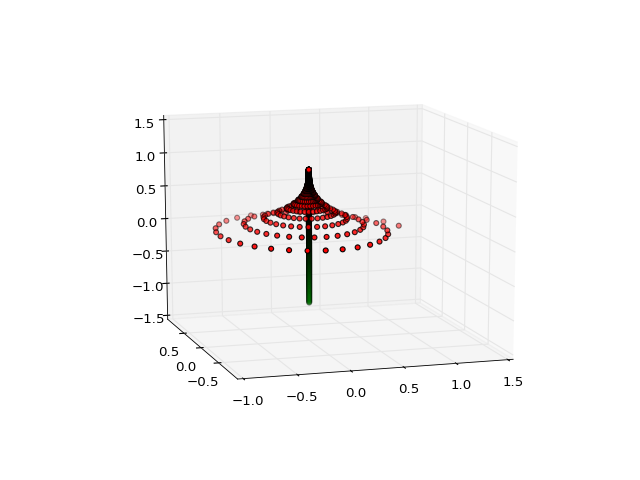

In [4]:
#1 
T1=260 #ms 
T2=84 #ms 
df=32.8 #Hz
time_step=1
time_range=range(0,1000,time_step)
list=[]
[A,B]=matrix_generator.getFreePrecessMatrix(time_step,T1,T2,df)
M=[0,0,1]
M=matrix_generator.getYRotationMatrix(math.pi/2).dot(M)
for t in time_range:
    M=A.dot(M)+B
    list.append(np.insert(M,0,t))

result1=np.asarray(list)

list=[]
df=0
[A,B]=matrix_generator.getFreePrecessMatrix(time_step,T1,T2,df)
M=[0,0,1]
M=matrix_generator.getYRotationMatrix(math.pi).dot(M)
for t in time_range:
    M=A.dot(M)+B
    list.append(np.insert(M,0,t))

result2=np.asarray(list)

fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(result1[:,1],result1[:,2],result1[:,3],c=[1,0,0])
ax.scatter(result2[:,1],result2[:,2],result2[:,3],c=[0,1,0])
ax.axis('equal')
plt.show()
